In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [2]:
np.random.seed(42)

In [3]:
X = 0.3 * np.random.randn(100,2)

In [6]:
X_train = np.r_[X+2, X-2]

In [7]:
X = 0.3 * np.random.rand(20,2)

In [9]:
X_test = np.r_[X+2, X-2]

In [10]:
X_outliers = np.random.uniform(low=-4, high = 4, size = (20,2))

In [11]:
X_outliers

array([[ 1.80873067,  3.80681664],
       [ 0.13040279, -1.41634822],
       [ 2.36148956, -1.83334199],
       [-0.48822863, -3.37234895],
       [-3.79719405,  3.70118732],
       [ 2.68784096,  1.56779365],
       [-0.72837644, -2.61364544],
       [-2.74850366, -1.99805681],
       [ 0.39381332,  1.71676738],
       [ 1.28157901, -1.76052882],
       [ 3.63892225,  1.90317533],
       [ 0.43483242,  0.89376597],
       [-0.6431995 , -2.01815208],
       [-1.15221857,  2.06276888],
       [-3.88485209, -3.07141888],
       [-3.63197886, -3.67416958],
       [ 2.84368467,  1.62926288],
       [-0.20660937, -3.21732671],
       [-0.067073  , -0.21222583],
       [-2.61438504, -0.52918681]])

In [16]:
clf = LocalOutlierFactor(novelty=True)

In [17]:
clf.fit(X_train)

LocalOutlierFactor(novelty=True)

In [18]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [19]:
y_pred_outliers = clf.predict(X_outliers)

In [20]:
xx, yy = np.meshgrid(np.linspace(-5,5,50), np.linspace(-5,5,50))

In [21]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

In [22]:
Z = Z.reshape(xx.shape)

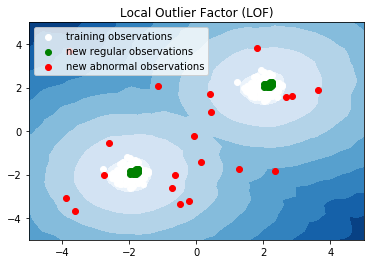

In [27]:
plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],["training observations","new regular observations", "new abnormal observations"],loc="upper left")
plt.show()


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [29]:
rng = np.random.RandomState(42)
# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [30]:
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)

IsolationForest(max_samples=100,
                random_state=RandomState(MT19937) at 0x25F453EF360)

In [31]:
clf

IsolationForest(max_samples=100,
                random_state=RandomState(MT19937) at 0x25F453EF360)

In [32]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [33]:
y_pred_test

array([ 1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1])

In [34]:
y_pred_train

array([ 1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,
       -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,
        1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,
        1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,
       -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,
        1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1])

In [35]:
y_pred_outliers 

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

In [36]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

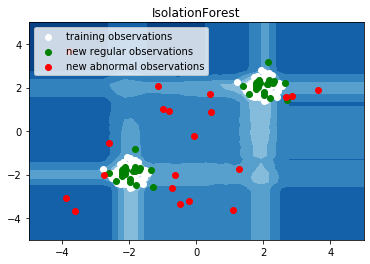

In [37]:
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c], ["training observations", "new regular observations", "new abnormal observations"],loc="upper left")
plt.show()

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from scipy import stats

In [40]:
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [41]:
rng = np.random.RandomState(42)
# Example settings
n_samples = 200
outliers_fraction = 0.25
clusters_separation = [0, 1, 2]

In [45]:
classifiers = { "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05, kernel="rbf", gamma=0.1), 
               "Isolation Forest": IsolationForest(random_state=rng),
               "Local Outlier Factor": LocalOutlierFactor(n_neighbors=35, contamination=0.25, novelty=True)}

xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.ones(n_samples, dtype=int)
ground_truth[-n_outliers:] = 0


In [46]:
clusters_separation

[0, 1, 2]

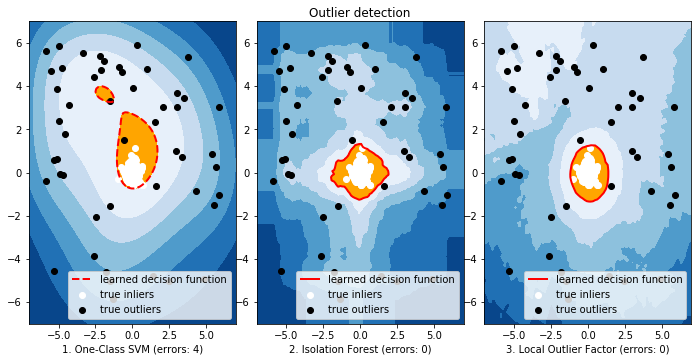

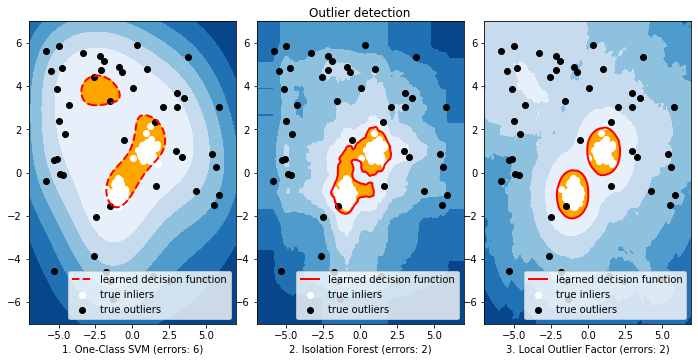

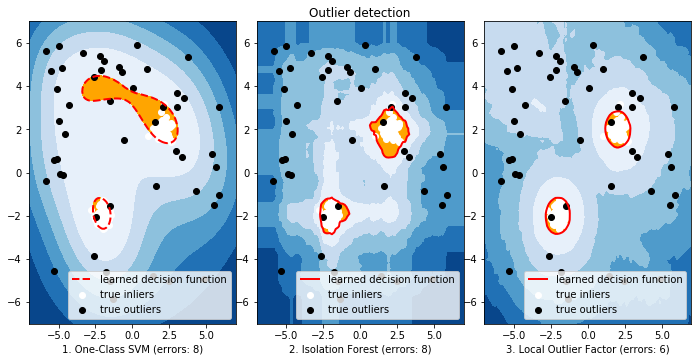

In [47]:
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]
    # Fit the model
    plt.figure(figsize=(10, 5))
    
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        # fit the data and tag outliers
        clf.fit(X)
        y_pred = clf.decision_function(X).ravel()
        threshold = stats.scoreatpercentile(y_pred,100 * outliers_fraction)
        
        y_pred = y_pred > threshold
        n_errors = (y_pred != ground_truth).sum()
        
        # plot the levels lines and the points
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(1, 3, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black')
        subplot.axis('tight')
        subplot.legend([a.collections[0], b, c], ['learned decision function', 'true inliers','true outliers'],
                       prop=matplotlib.font_manager.FontProperties(size=10), loc='lower right')
        
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))

    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")
plt.show()